In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


## корреляции

<AxesSubplot:>

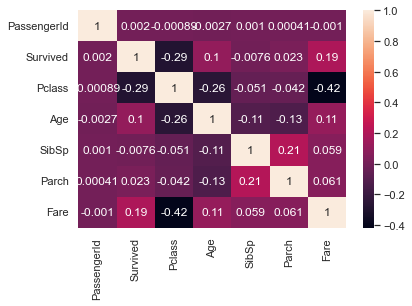

In [6]:
sns.heatmap(data.corr(), annot = True)

<ul>
    <li>SibSp и Parch имеют положительную корреляцию, что свидетельствует о количестве членов семьи, сопровождающих пассажира.</li>
    <li>Pclass и Age имеют отрицательную корреляцию, что означает, что чем выше возраст, тем лучше класс билета.</li>
    <li>Pclass и urvived имеют отрицательную корреляцию, что означает, что лучше класс билета, выше шансы на выживание.</li>
    <li>Age и SibSp имеют отрицательную корреляцию, что означает, что чем меньше возраст, тем больше число членов семьи, сопровождающих пассажира.</li>
    <li>Fare и Pclass имеют отрицательную корреляцию, что означает, что более высокие тарифы подразумевают более качественные классы билетов (меньший номер класса) и наоборот.</li>
</ul>

## Приведение к цифровому виду

### Приводим строковые значения полей к числовым
### Sex 
Sex female - 0 \
Sex male - 1
### Embarked
C - 0 \
Q - 1 \
S - 2 

In [7]:
data['Sex'].replace('female', 0,  inplace=True)
data['Sex'].replace('male', 1,  inplace=True)
data['Sex'] = data['Sex'].astype(float)
data['Embarked'].replace('C', 0, inplace=True)
data['Embarked'].replace('Q', 1,  inplace=True)
data['Embarked'].replace('S', 2, inplace=True)
data['Embarked'] = data['Embarked'].astype(float)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",1.0,NaN,2,0,209245,27.14,C12239,2.0
1,1,0,3,"Bryan, Drew",1.0,NaN,0,0,27323,13.35,NaN,2.0
2,2,0,3,"Owens, Kenneth",1.0,0.33,1,2,CA 457703,71.29,NaN,2.0
3,3,0,3,"Kramer, James",1.0,19.00,0,0,A. 10866,13.04,NaN,2.0
4,4,1,3,"Bond, Michael",1.0,25.00,0,0,427635,7.76,NaN,2.0


## Корреляции на основе обновленных данных


<AxesSubplot:>

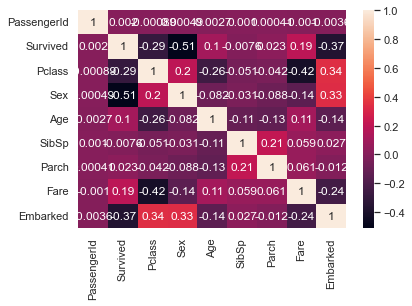

In [9]:
sns.heatmap(data.corr(), annot = True)

<ul>
    <li>Embarked и Survived имеют корреляцию, что означает, что порт посадки поссажира влияет на его виживание</li>
    <li>Sex и Survived имеют корреляцию, что означает, что выживаемость зависит от пола</li>
    <li>Embarked и Fare имеют корреляцию это означает то, что тариф завист от порта</li>
    <li>Embarked и Sex имеют корреляцию это означает то,, что конечная точка завсит от пола поссажира</li>
    <li>Embarked и Pclass имеют корреляцию это означает то, пассажиры разных классов погружаются в разные порты</li>
</ul>

## Влияние характеристик на виживание

### Вохраст

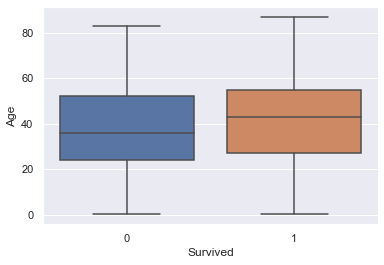

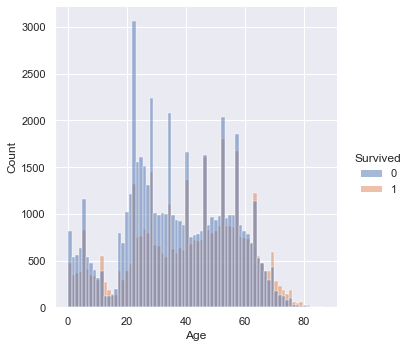

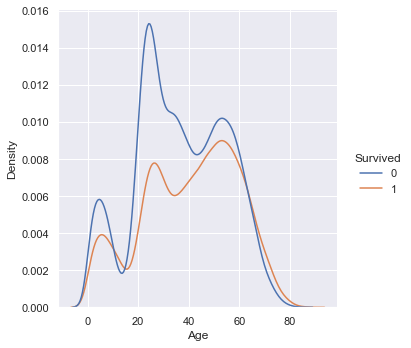

In [10]:
sns.boxplot(x='Survived', y='Age', data = data)
sns.displot(x=data['Age'], hue= data['Survived'])
sns.displot(x=data['Age'], hue= data['Survived'], kind='kde')


По графикам можно увидеть, что выживаемость не имеет нормального распреедления, а так же то что максимальная смертность приходит на возраст 20-25, а дальше падает. Из этого можно сделать вывод, что чем больше возраст, тем выше шанс выживания.

### Пол

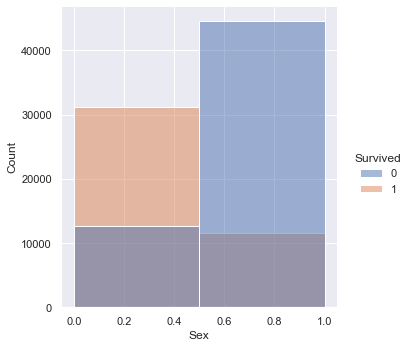

In [11]:
sns.displot(x=data['Sex'], hue= data['Survived'], bins = 2)


По графику видно, что мужчин в целом больше чем женщин, а так же, что мужчины спасились значительно реже

### Тариф

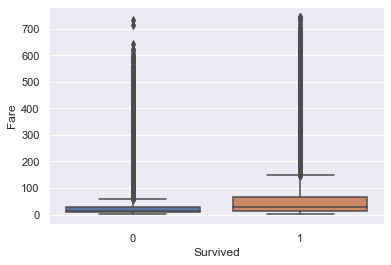

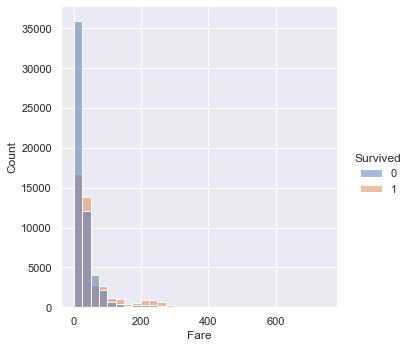

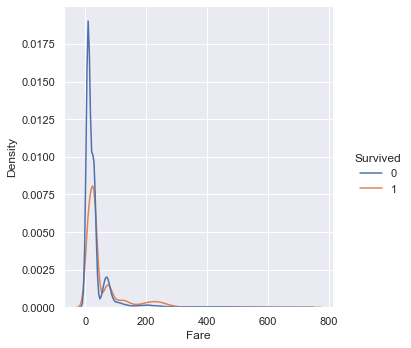

In [15]:
sns.boxplot(x='Survived', y='Fare', data = data)
sns.displot(x=data['Fare'], hue= data['Survived'], bins=30)
sns.displot(x=data['Fare'], hue= data['Survived'], kind='kde')

По графикам видно, что чем выше цена поездки, тем выше шанс выжить, веротяно изза более высокого класса кают
Выбросы для цены билетов не виживших

### Точка назначения

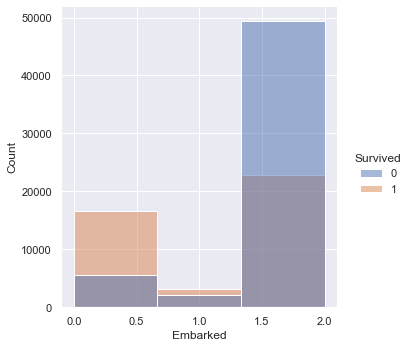

In [17]:
sns.displot(x=data['Embarked'], hue= data['Survived'], bins = 3)

По графикам видно что большинстов посажиров погрузились в порту S(2) Southampton и меньшая часть из них выжила.\
Наибольший шанс выжить имел пассажир из порта C(0) Cherbourg.

### Семья

In [26]:
data['Family'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,0,1,1,"Oconnor, Frankie",1.0,NaN,2,0,209245,27.14,C12239,2.0,2
1,1,0,3,"Bryan, Drew",1.0,NaN,0,0,27323,13.35,NaN,2.0,0
2,2,0,3,"Owens, Kenneth",1.0,0.33,1,2,CA 457703,71.29,NaN,2.0,3
3,3,0,3,"Kramer, James",1.0,19.00,0,0,A. 10866,13.04,NaN,2.0,0
4,4,1,3,"Bond, Michael",1.0,25.00,0,0,427635,7.76,NaN,2.0,0


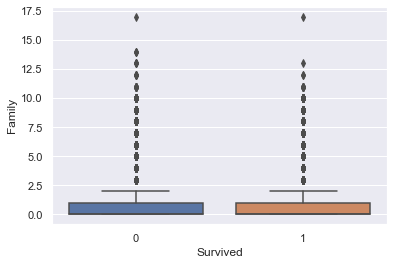

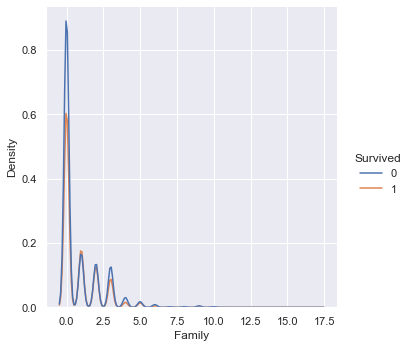

In [28]:
sns.boxplot(x='Survived', y='Family', data = data)
sns.displot(x=data['Family'], hue= data['Survived'], kind='kde')

По графикам видно, что наличие родствеников на корабле никак не влияет на виживаемость, а так же имеются выбросы